The focus is on demonstrating methodology and analytical thinking, not on the complexity or quantity of technical implementations


Let's open access to Google Drive where the tables are stored



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's set the path and open the table *products* as a pandas DataFrame.


In [2]:
import pandas as pd
import os

# File path
file_path = '/content/drive/MyDrive/products.parquet'

# Load table as pandas df
products = pd.read_parquet(file_path)

# View first 7 rows of data
products.head(7)

,product_id,category_lvl4,category_lvl5,category_lvl3,category_lvl2
0,1,1,1,1,1
1,2,2,2,2,1
2,3,3,3,1,1
3,4,3,3,1,1
4,5,3,4,1,1
5,6,3,4,1,1
6,7,2,5,2,1


Let's check the dataframe size


In [ ]:
products.size

1175

Let's check for missing values

In [ ]:
nan_counts = products.isna().sum()
print(nan_counts)

product_id       0
category_lvl4    0
category_lvl5    0
category_lvl3    0
category_lvl2    0
dtype: int64


Let's reorder columns for logical structure

In [ ]:
products = products[['product_id', 'category_lvl5', 'category_lvl4', 'category_lvl3', 'category_lvl2']]


Let's count unique values per column


In [ ]:
unique_counts = products.nunique()
print(unique_counts)

product_id       235
category_lvl5     88
category_lvl4     46
category_lvl3      7
category_lvl2      1
dtype: int64


Colclusion: we have a df of 235 unique products. Categorizing them with level 2 (lvl2) detail, the df authors obtained 1 product group containing all 235 products. At level 5 (lvl5), there are 88 product groups (less than 3 products per group)

The products table is quite simple. Let's move to the actions table

In [5]:
# File path
file_path = '/content/drive/MyDrive/actions.parquet'

# Load table as pandas df
actions = pd.read_parquet(file_path)

# Let's take a look at first 7 rows of data
actions.head(7)

,product_id,store_id,promo_id,promo_type1_id,promo_type2_id,promo_price,discount,promo_type3_id,date_from,date_to,sales_qty
0,1,1,1,1,3,79.980003,0.20,1,2024-01-01,2024-01-07,10502.0
1,1,1,2,1,3,89.980003,0.25,1,2024-01-08,2024-01-14,29638.0
2,1,1,3,1,3,99.980003,0.17,1,2024-02-19,2024-02-25,40510.0
3,1,2,4,1,1,69.980003,0.30,1,2023-02-27,2023-03-05,167316.0
4,1,2,5,1,3,69.980003,0.22,1,2023-03-06,2023-03-12,154093.0
5,1,2,6,1,1,49.990002,0.44,1,2023-03-13,2023-03-19,185394.0
6,1,2,7,1,3,59.990002,0.33,1,2023-03-20,2023-03-26,151059.0


Let's check the dataframe size

In [4]:
actions.size

92059

How many missing values per column?



In [ ]:
nan_counts = actions.isna().sum()
print(nan_counts)

product_id        0
store_id          0
promo_id          0
promo_type1_id    0
promo_type2_id    0
promo_price       0
discount          0
promo_type3_id    0
date_from         0
date_to           0
sales_qty         4
dtype: int64


Let's count unique values per column


In [ ]:
# Let's choose the columns
columns_to_check = ['product_id', 'store_id', 'promo_id', 'promo_type1_id', 'promo_type2_id', 'promo_type3_id']

# Counting unique values
unique_counts = actions[columns_to_check].nunique()
print(unique_counts)

product_id        235
store_id            2
promo_id          116
promo_type1_id      4
promo_type2_id      6
promo_type3_id      2
dtype: int64


The number of product_ids is identical in both dataframes. Just in case, let's verify if all ids from the first dataframe exist in the second dataframe

In [ ]:
# All product_id from "products" are in "actions"?
all_present = products['product_id'].isin(actions['product_id']).all()

if all_present:
    print("Все product_id из products присутствуют в actions")
else:
    print("Не все product_id из products присутствуют в actions")

Все product_id из products присутствуют в actions


Let's clarify what values the columns containing promotion type information take

In [6]:
columns_to_check = ['promo_type1_id', 'promo_type2_id', 'promo_type3_id']

for col in columns_to_check:
    unique_values = actions[col].dropna().unique()
    print(f"Column {col}")
    print(f"Unique values: {sorted(unique_values)}")
    print()

Column promo_type1_id
Unique values: [np.int32(1), np.int32(2), np.int32(5), np.int32(8)]

Column promo_type2_id
Unique values: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6)]

Column promo_type3_id
Unique values: [np.int32(1), np.int32(2)]



How many promos per shop?

In [7]:
# From the shop with id = 1
count_store_1 = actions[actions['store_id'] == 1]['promo_id'].nunique()
print(f"Number of unique promo_ids for store 1: {count_store_1}")

# From the shop with id = 2
count_store_2 = actions[actions['store_id'] == 2]['promo_id'].nunique()
print(f"Number of unique promo_ids for store 2: {count_store_2}")

Number of unique promo_ids for store 1: 116
Number of unique promo_ids for store 2: 116


Let's find out the ranges of other columns

In [8]:
# Statistics for three numeric columns
print("Prices, discounts, quantity sold")
numeric_stats = actions[['promo_price', 'discount', 'sales_qty']].describe()
print(numeric_stats)

# Now for dates. They are in object format, need to convert
print("\nAs for dates")
for col in ['date_from', 'date_to']:
    dates = pd.to_datetime(actions[col], errors='coerce')
    print(f"{col}:")
    print(f"  Range: {dates.min()} - {dates.max()}")


Prices, discounts, quantity sold
       promo_price     discount     sales_qty
count  8369.000000  8369.000000  8.365000e+03
mean    145.572891     0.221795  3.469284e+04
std     144.964966     0.112737  9.164882e+04
min      14.990000     0.000000  7.140000e-01
25%      79.980003     0.140000  5.138444e+03
50%      99.980003     0.210000  1.309180e+04
75%     169.899994     0.290000  3.303200e+04
max    1499.900024     0.690000  2.078527e+06

As for dates
date_from:
  Range: 2022-06-27 00:00:00 - 2024-07-29 00:00:00
date_to:
  Range: 2022-07-03 00:00:00 - 2024-08-04 00:00:00


Let's determine if promotion periods overlap for any product-store pair

In [ ]:
# Create product_id + store_id pair column
actions['product_store'] = actions['product_id'].astype(str) + '_' + actions['store_id'].astype(str)

# Group by unique product_store pairs
grouped = actions.groupby('product_store')

# Check date overlap within each group
def has_overlap(df):
    # Sort by date_from
    df_sorted = df.sort_values('date_from')
    # Check if next interval overlaps with current
    for i in range(len(df_sorted) - 1):
        current_end = df_sorted.iloc[i]['date_to']
        next_start = df_sorted.iloc[i+1]['date_from']
        if next_start <= current_end:
            return True
    return False

# Apply has_overlap to each group
overlap_results = grouped.apply(has_overlap).reset_index()
overlap_results.columns = ['product_store', 'has_overlap']

# Show pairs with overlapping promotions
overlapping_pairs = overlap_results[overlap_results['has_overlap']]
print(overlapping_pairs)

    product_store  has_overlap
8           104_1         True
9           104_2         True
10          105_1         True
11          105_2         True
42           11_1         True
..            ...          ...
439          88_2         True
454          95_1         True
460          98_1         True
461          98_2         True
464           9_1         True

[79 rows x 2 columns]


/tmp/ipython-input-2198906336.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overlap_results = grouped.apply(has_overlap).reset_index()


Let's determine promotion durations and which weekdays they started/ended on

In [9]:
# Changing column format to datetime
actions['date_from'] = pd.to_datetime(actions['date_from'])
actions['date_to'] = pd.to_datetime(actions['date_to'])

# Creating duration column
actions['duration'] = (actions['date_to'] - actions['date_from']).dt.days + 1

# Create weekday columns
actions['start_day'] = actions['date_from'].dt.day_name()
actions['end_day'] = actions['date_to'].dt.day_name()

# Display data
print(" Promotion duration ")
print(f"Max: {actions['duration'].max()} days")
print(f"Median: {actions['duration'].median()} days")
print(f"Mean: {actions['duration'].mean():.1f} days")

# Focus on longest promotions
print(f"\n Longest promotions")
print(actions.nlargest(5, 'duration')[['promo_id', 'duration']])

# Weekdays
print(f"\n Weekdays")
print("Start:")
print(actions['start_day'].value_counts())
print("\nEnd:")
print(actions['end_day'].value_counts())

 Promotion duration 
Max: 14 days
Median: 7.0 days
Mean: 6.9 days

 Longest promotions
     promo_id  duration
45         37        14
137        37        14
161        37        14
237        37        14
363        37        14

 Weekdays
Start:
start_day
Monday       8177
Thursday       96
Friday         47
Wednesday      24
Tuesday        14
Sunday          7
Saturday        4
Name: count, dtype: int64

End:
end_day
Sunday       8094
Thursday       92
Wednesday      69
Tuesday        60
Saturday       26
Friday         26
Monday          2
Name: count, dtype: int64


Findings:

* The actions table contains the same products as the products table
* We have only 2 stores
* Prices range from $15 to $1,500 (rounded)
* Discounts range from 0% to 69%
* Sold quantities are quite large, with a maximum exceeding 2 million. This likely indicates very large stores
* 116 promotional campaigns were conducted. They are categorized in a not entirely clear manner. Based on the absence of missing values, each promotion simultaneously belongs to three types and is assigned a subtype number within each
* Both stores conducted 116 promotions each
* The earliest promotion started on June 27, 2022; the latest ended on August 4, 2024
* Average promotion duration is 7 days, maximum is 14 days
* Promotions typically started on Mondays and ended on Sundays



Let's create an analytical data mart using PySpark

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Create spark session
spark = SparkSession.builder.appName("AnalyticalMart").getOrCreate()

# Create spark dataframes
actions_df = spark.createDataFrame(actions)
products_df = spark.createDataFrame(products)

# Now analytical data mart
# Join two tables
analytical_mart = (actions_df
    .join(products_df, "product_id", "left")

    # Aggregates per product-store
    .groupBy("product_id", "store_id")
    .agg(
        # Sales metrics
        F.sum("sales_qty").alias("total_sales"),

        # Promotion metrics
        F.count("promo_id").alias("promo_count"),
        F.mean("promo_price").alias("avg_promo_price"),
        F.mean("discount").alias("avg_discount"),
        F.mean("duration").alias("avg_duration"),

        # Max sales and promotion duration
        F.max("sales_qty").alias("max_sales"),
        F.max("duration").alias("max_duration"),
    )

    # Add product categories
    # .join(products_df.select("product_id", "category_lvl2", "category_lvl3"), "product_id", "left")
)

# Result
analytical_mart.show(10)
print(f"Data mart size: {analytical_mart.count()} rows")

+----------+--------+------------------+-----------+------------------+-------------------+------------------+------------------+------------+
|product_id|store_id|       total_sales|promo_count|   avg_promo_price|       avg_discount|      avg_duration|         max_sales|max_duration|
+----------+--------+------------------+-----------+------------------+-------------------+------------------+------------------+------------+
|        26|       1|          305597.0|         46|58.422610739003055| 0.2682608689545937|7.1521739130434785|           16206.0|          14|
|        26|       2|          798504.0|         45| 58.61000205145942|0.27111111051506465| 7.155555555555556|           55473.0|          14|
|        29|       1|          244584.0|         16| 128.6799988746643|0.22999999951571226|               7.0|           29111.0|           7|
|        29|       2|          545093.0|         16| 128.6799988746643|0.22999999951571226|               7.0|           65338.0|           7|

Let's join both tables and think about a sales prediction strategy

In [11]:
combined = actions.merge(products, on='product_id', how='left')

Let's drop unnecessary columns

In [12]:
columns_to_drop = [
    'product_store',  # Technical feature
    'start_day',      # Object type feature, numerical features are preferred
    'end_day',        # Object type feature, numerical features are preferred
]

combined = combined.drop(columns=columns_to_drop, errors='ignore')

Let's extract the necessary temporal features

In [13]:
# Promotion month and year
combined['promo_month'] = combined['date_from'].dt.month
combined['promo_year'] = combined['date_from'].dt.year

# Seasons (quarters)
combined['season'] = combined['date_from'].dt.quarter

# Weekdays in numeric format
combined['start_day_num'] = combined['date_from'].dt.dayofweek
combined['end_day_num'] = combined['date_to'].dt.dayofweek

Historical sales data

In [14]:
# Take data until January 15, 2024
combined_until_jan_2024 = combined[combined['date_from'] < '2024-01-15']

# Calculate average sales until January 15, 2024 for each product-store pair (average across promotions)
historical_avg_until_jan_2024 = combined_until_jan_2024.groupby(['product_id', 'store_id'])['sales_qty'].agg(['mean']).reset_index()
historical_avg_until_jan_2024.columns = ['product_id', 'store_id', 'historical_mean_sales_until_jan_2024']

# Merge with our combined dataframe
combined = combined.merge(historical_avg_until_jan_2024, on=['product_id', 'store_id'], how='left')

# Account for number of promotions per product until January 15, 2024
promo_frequency_until_jan_2024 = combined_until_jan_2024.groupby('product_id')['promo_id'].nunique().reset_index(name='total_promos_per_product_until_jan_2024')
combined = combined.merge(promo_frequency_until_jan_2024, on='product_id', how='left')

# Fill missing values with zeros (for products not present in data before January 15, 2024)
combined['total_promos_per_product_until_jan_2024'] = combined['total_promos_per_product_until_jan_2024'].fillna(0)

# Important period: New Year. Consider promotions falling in December 20-31 as an important detail
combined['is_december_holiday_period'] = (
    ((combined['date_from'] <= '2023-12-31') & (combined['date_to'] >= '2023-12-20')) |
    ((combined['date_from'] <= '2022-12-31') & (combined['date_to'] >= '2022-12-20')) |
    ((combined['date_from'] <= '2021-12-31') & (combined['date_to'] >= '2021-12-20'))
).astype(int)

Let's remove features that don't make sense from a model evaluation perspective. And perform encoding on several other features

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Remove category_lvl2 (takes only 1 value)
# Remove promo_id (assuming new promotions can be created with new promo_ids, so remove from data)
# Dates themselves don't carry useful information for modeling, but we'll remove them later as they're needed for data splitting

columns_to_drop = ['category_lvl2', 'promo_id']
combined = combined.drop(columns=columns_to_drop)

# Perform Mean Target Encoding for several features
def mean_target_encoding(df, columns, target='sales_qty'):
    df_encoded = df.copy()
    for col in columns:
        mean_encoding = df.groupby(col)[target].mean().to_dict()
        # Create new column
        df_encoded[f'{col}_mean_encoded'] = df[col].map(mean_encoding)
        # Remove original column, EXCEPT for category_lvl3
        if col != 'category_lvl3':
            df_encoded = df_encoded.drop(columns=[col])
    return df_encoded

# Apply mean target encoding
encoding_columns = ['product_id', 'category_lvl5', 'category_lvl4', 'category_lvl3']
combined = mean_target_encoding(combined, encoding_columns, target='sales_qty')

# One-Hot Encoding for several other features (which have limited unique values)
def one_hot_encoding(df, columns):
    df_encoded = df.copy()
    for col in columns:
        # Create dummy variables (indicators)
        dummies = pd.get_dummies(df[col], prefix=col, prefix_sep='_')
        # Add them to our dataframe
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        # Remove original column
        df_encoded = df_encoded.drop(columns=[col])
    return df_encoded

# Apply one-hot encoding
one_hot_columns = ['promo_type1_id', 'promo_type2_id', 'promo_type3_id', 'store_id']
combined = one_hot_encoding(combined, one_hot_columns)

In [16]:
unique_combinations = combined[['category_lvl3', 'category_lvl3_mean_encoded']].drop_duplicates()
unique_combinations.head(10)

,category_lvl3,category_lvl3_mean_encoded
0,1,44903.849070
13,2,16421.130678
89,3,65972.274287
91,4,44485.769231
142,5,13842.189830
170,6,16403.407053
267,7,2248.863536


Now that we know how categories at detail level 3 are encoded, we can remove the category_lvl3 column

In [17]:
combined = combined.drop('category_lvl3', axis=1)

Hypotheses (briefly)

* The lower the price, the higher the sales
* The higher the discount percentage, the higher the sales, even at the same price (psychologically, people are more willing to buy when they see a large discount)
* The longer the promotion, the more time people have to make purchases
* There are temporal fluctuations, so it's important to account for season, day of week, etc.
* The higher the historical sales, the higher they will be in the future, all else being equal
* The more promotions a product has had in the past, the less responsive customers become to them
* Before New Year holidays, all products are purchased in larger quantities compared to non-holiday periods
* There are also individual effects of product, promotion type, and store

Let's extract data for April 2024; it will be useful later for testing

In [18]:
april_2024 = combined[
    (combined['date_from'].dt.year == 2024) &
    (combined['date_from'].dt.month == 4)
].copy()

april_2024 = april_2024.drop(['date_from', 'date_to'], axis=1)

X_april_2024 = april_2024.drop('sales_qty', axis=1)
y_april_2024 = april_2024['sales_qty']

Let's split the data into those for model evaluation and February data

In [19]:
# Extract training set (until mid-January 2024)
# And february set (all promotions starting in February weeks)
train = combined[combined['date_from'] < '2024-01-15'].copy()
february = combined[(combined['date_from'] >= '2024-02-01') & (combined['date_from'] <= '2024-02-29')].copy()

# Create X_train, y_train
X_train = train.drop('sales_qty', axis=1)
y_train = train['sales_qty']

# The test set will essentially be the February promotions
X_test = february.drop('sales_qty', axis=1)
y_test = february['sales_qty']

# Sort by date
train = train.sort_values('date_from')

# Now remove date features that are no longer needed from training and February data
X_train = X_train.drop(['date_from', 'date_to'], axis=1)
X_test = X_test.drop(['date_from', 'date_to'], axis=1)

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data preprocessing
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

# TimeSeriesSplit on pre-sorted (by time) data
splitter = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=splitter,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

# Final evaluation on test data
final_model = grid_search.best_estimator_
y_pred_test = final_model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# For reference: metrics on training data
y_pred_train = final_model.predict(X_train)
print(f"\nTraining results (for comparison):")
print(f"R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
R²: 0.6825
MAE: 15743.5001
RMSE: 41478.5976

Training results (for comparison):
R²: 0.9933
MAE: 2827.2587
RMSE: 7980.6045


Let's visualize the tree

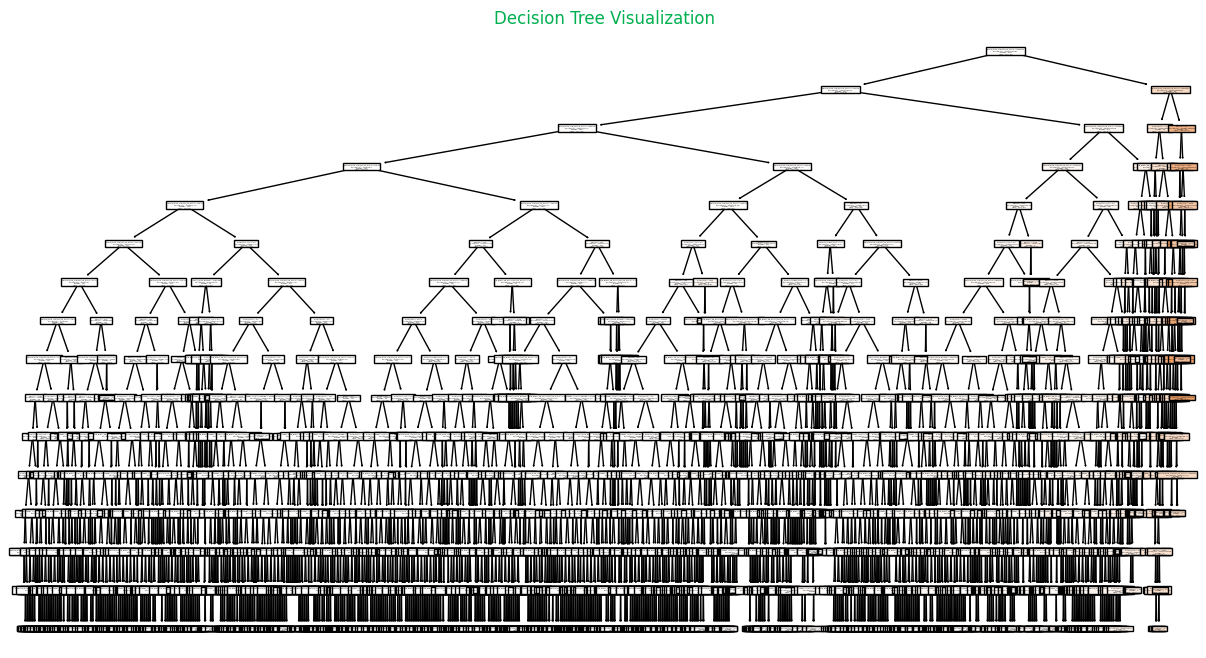

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib as mlp

# Changing the color
mlp.rcParams['axes.titlecolor'] = '#00B050'

fig = plt.figure(figsize=(15, 8))
tree.plot_tree(final_model, filled=True, feature_names=X_train.columns.tolist())
plt.title("Decision Tree Visualization")
plt.show()

Now let's compare the forecast with actuals using WAPE and BIAS metrics for April 2024 at the category_lvl3 level

In [22]:
# Preprocessing just in case
X_april_2024 = X_april_2024.fillna(X_april_2024.mean())
y_april_2024 = y_april_2024.fillna(y_april_2024.mean())

# Make our forecast
y_pred_april = final_model.predict(X_april_2024)

# Choose evaluation metrics
def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def wape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

# Overall metrics for April of the considered year
april_bias = bias(y_april_2024, y_pred_april)
april_wape = wape(y_april_2024, y_pred_april)

print("Overall metrics for April 2024:")
print(f"BIAS: {april_bias:.4f}")
print(f"WAPE: {april_wape:.4f}")


print("\nWE REMEMBER THAT:")
print(unique_combinations.to_string(index=False))

# At the category_lvl3 level
april_results = X_april_2024.copy()
april_results['actual_sales'] = y_april_2024
april_results['predicted_sales'] = y_pred_april
april_results['category_lvl3'] = april_results['category_lvl3_mean_encoded']

# Grouping by category_lvl3 and calculating metrics
category_metrics = april_results.groupby('category_lvl3').apply(
    lambda x: pd.Series({
        'bias': bias(x['actual_sales'], x['predicted_sales']),
        'wape': wape(x['actual_sales'], x['predicted_sales']),
        'actual_total': x['actual_sales'].sum(),
        'predicted_total': x['predicted_sales'].sum(),
        'promo_count': len(x)
    })
).reset_index()

# Statistics of metrics by categories
print(f"\nStatistics by categories:")
print(f"BIAS - Mean: {category_metrics['bias'].mean():.4f}, Std: {category_metrics['bias'].std():.4f}")
print(f"WAPE - Mean: {category_metrics['wape'].mean():.4f}, Std: {category_metrics['wape'].std():.4f}")

# Categories with best and worst results
best_wape = category_metrics.nsmallest(3, 'wape')
worst_wape = category_metrics.nlargest(3, 'wape')

print(f"\nBest categories (by WAPE):")
for idx, row in best_wape.iterrows():
    print(f"Category {row['category_lvl3']:.4f}: WAPE={row['wape']:.4f}")

print(f"\nWorst categories (by WAPE):")
for idx, row in worst_wape.iterrows():
    print(f"Category {row['category_lvl3']:.4f}: WAPE={row['wape']:.4f}")

# Final results summary
print(f"\nLet's summarize:")
print(f"Overall BIAS for April: {april_bias:.4f}")
print(f"Overall WAPE for April: {april_wape:.4f}")
print(f"Mean WAPE across categories: {category_metrics['wape'].mean():.4f}")
print(f"Median WAPE across categories: {category_metrics['wape'].median():.4f}")

Overall metrics for April 2024:
BIAS: -736.1605
WAPE: 0.5043

WE REMEMBER THAT:
 category_lvl3  category_lvl3_mean_encoded
             1                44903.849070
             2                16421.130678
             3                65972.274287
             4                44485.769231
             5                13842.189830
             6                16403.407053
             7                 2248.863536

Statistics by categories:
BIAS - Mean: -2041.2007, Std: 3479.7187
WAPE - Mean: 0.5097, Std: 0.1627

Best categories (by WAPE):
Category 16403.4071: WAPE=0.2763
Category 65972.2743: WAPE=0.4175
Category 13842.1898: WAPE=0.4741

Worst categories (by WAPE):
Category 2248.8635: WAPE=0.7184
Category 16421.1307: WAPE=0.6665
Category 44903.8491: WAPE=0.5052

Let's summarize:
Overall BIAS for April: -736.1605
Overall WAPE for April: 0.5043
Mean WAPE across categories: 0.5097
Median WAPE across categories: 0.4897


/tmp/ipython-input-949088933.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_metrics = april_results.groupby('category_lvl3').apply(


Factors Influencing Forecast Quality

Positive factors include:

* Temporal features such as month and day of week allowed accounting for seasonality and periodic sales fluctuations
* Promotion-related features: discount size, duration, and price are critical factors, and we had access to them
* Product category knowledge enabled meaningful encoding and provided valuable information, etc.

Limiting factors:

Lack of data on:

* Competitive offers and promotions
* General economic conditions (fluctuations in purchasing power, etc.)
* Weather conditions
* Holiday schedules (no information about the country in question)
* Inventory levels (if stock runs out, sales would obviously be zero even at low prices)

Other quality influences:

* Temporal gaps – the model was trained on data up to January but tested on February and April statistics

Enhancing existing datasets with the mentioned features and designing a task without temporal gaps could be steps toward improving forecasts

Additionally, it would be beneficial to shift from predicting total sales per promotion to predicting daily sales rates during promotions, as promotion durations vary